<img src="img/csdms_logo.jpg">

# Run the Diffusion model

Use this notebook to demonstrate how to run the Diffusion model.

Before starting, make sure you've installed the **bmi-live-2018** package in developer mode. Execute this statement at the command line (not in this notebook!):

    $ python setup.py develop

Include one import that we'll use later in this notebook:

In [1]:
import numpy as np

Start by importing the `Diffusion` class from the **bmi-live-2018** package:

In [2]:
from bmi_live.diffusion import Diffusion

Create an instance of the model:

In [3]:
m = Diffusion()

This instance uses default parameter values set up in the class. Let's view them

In [6]:
from __future__ import print_function

In [7]:
print('Number of columns:', m.nx)
print('Number of rows:', m.ny)
print('Spacing between columns:', m.dx)
print('Spacing between rows:', m.dy)
print('Diffusivity coefficient:', m.alpha)

Number of columns: 8
Number of rows: 6
Spacing between columns: 1.0
Spacing between rows: 1.0
Diffusivity coefficient: 0.9


What does the initial temperature array look like?

In [8]:
print(m.temperature)

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


Add a unit impulse to the initial temperature field: 

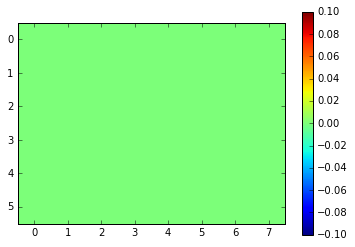

In [12]:
import matplotlib.pyplot as plt
plt.imshow(m.temperature)
plt.colorbar()
plt.show()

In [13]:
m.temperature[3, 3] = 100.0

Check that the temperature field has been updated:

In [14]:
print(m.temperature)

[[   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.  100.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]]


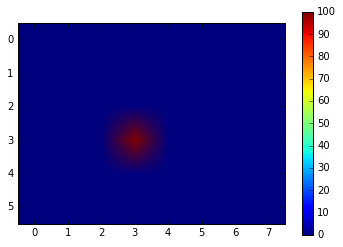

In [15]:
import matplotlib.pyplot as plt
plt.imshow(m.temperature)
plt.colorbar()
plt.show()

Now advance the model by a single time step:

In [17]:
m.advance()

View the new state of the temperature field:

In [18]:
print(m.temperature)

[[  0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      3.125   0.      0.      0.      0.   ]
 [  0.      0.      3.125  87.5     3.125   0.      0.      0.   ]
 [  0.      0.      0.      3.125   0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.   ]]


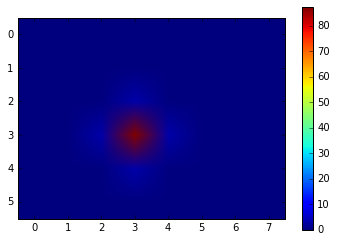

In [19]:
import matplotlib.pyplot as plt
plt.imshow(m.temperature)
plt.colorbar()
plt.show()

There's diffusion!

Advance the model to some distant time:

In [20]:
distant_time = 10
for _ in range(distant_time):
    m.advance()

View the new state of the temperature field (with help from `np.set_printoptions`):

In [21]:
np.set_printoptions(formatter={'float': '{: 6.2f}'.format})
print(m.temperature)

[[  0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00]
 [  0.00   0.08   0.55   1.80   0.55   0.08   0.01   0.00]
 [  0.00   0.55   3.53  10.66   3.53   0.55   0.05   0.00]
 [  0.00   1.80  10.66  29.92  10.66   1.82   0.19   0.00]
 [  0.00   0.54   3.48  10.47   3.48   0.54   0.05   0.00]
 [  0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00]]


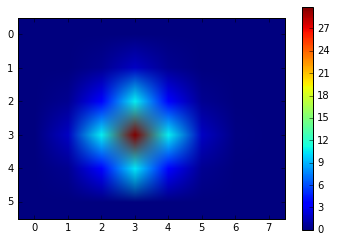

In [22]:
import matplotlib.pyplot as plt
plt.imshow(m.temperature)
plt.colorbar()
plt.show()

Note that temperature is set to zero at the boundaries.